<a href="https://colab.research.google.com/github/pawelrat009/ML2025-1/blob/main/MLzad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pobierz dane dotyczące scoringu kredytowego

Pracujesz jako analityk danych w globalnej firmie finansowej. Przez lata firma gromadziła podstawowe dane bankowe i wiele informacji związanych z kredytami. Kierownictwo chce zbudować inteligentny system do segregowania ludzi w przedziałach oceny kredytowej, aby zmniejszyć wysiłek ręczny.

Zadanie na dziś: przygotować dane do modelu

In [8]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import danych

In [10]:

# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train.csv"

# Load the latest version
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "parisrohan/credit-score-classification", file_path,
)

print("First 5 records:", df.head())

<ipython-input-10-db52f5663265>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "parisrohan/credit-score-classification", file_path,


First 5 records:        ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utiliz

/usr/local/lib/python3.11/dist-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


Poznaj dane:
1. sprawdź wymiary i typy kolumn
2. usuń duplikaty
3. usuń zdbędne kolumny
4. sprawdz liczbę braków danych w poszczególnych kolumnach

ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64
**************************************************
Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64
**************************************************
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
**************************************************
Name
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: count, Lengt

<Axes: xlabel='count', ylabel='Credit_Score'>

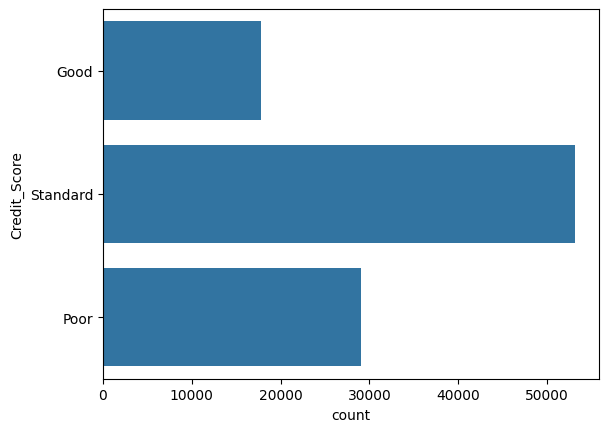

In [7]:
#opisz statystyki danych
df.describe()
#zlicz różne wartości danych
for i in df.columns:
 print(df[i].value_counts())
 print('*'*50)
# pokaż liczności danych kategorycznych
sns.countplot(df['Credit_Score'])
#zastąp błędne dane

Usuń kolumny, które nie będą wykorzystywane w analizie ['ID','Customer_ID','SSN','Name']

usuń niektore z zbędnych znakow ('_','-'), zmień puste komorki na nan

Zmień nazwy miesiecy na zmienne liczbowe zgodnie z kolejnością miesięcy

Zakoduj zmienne tekstowe: 'Occupation', 'Type_of_Loan', 'Payment_Behaviour', 'Credit_Mix', użyj LabelEncodera